In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [10]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

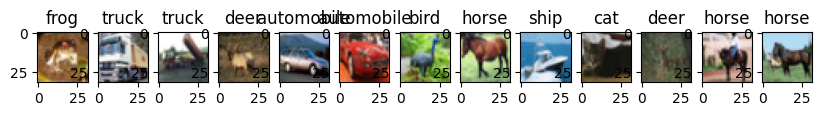

In [13]:
import matplotlib.pyplot as plt

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(start, finish):
    plt.figure(figsize=(10, 5))
    temp = 0
    for i in list(range(start, finish+1)):
        temp += 1
        plt.subplot(1, finish-start+1, temp)
        plt.imshow(x_train[i]),
        plt.title(classes[y_train[i][0]])
    plt.show()
show_image(0,12)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train[0].shape


(32, 32, 3)

In [15]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def CNN(X_train, y_train, X_test, y_test, epochs=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=x_train[0].shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=epochs)
    
    y_pred = model.predict(X_test)
    y_pred = [np.argmax(i) for i in y_pred]
    report = classification_report(y_test.reshape(-1), y_pred)
    print("Classification Report:")
    print(report)
    
CNN(x_train, y_train, x_test, y_test, epochs=5)  

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.3051 - loss: 1.8639
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5307 - loss: 1.3154
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.5955 - loss: 1.1400
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6496 - loss: 0.9994
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6789 - loss: 0.9207
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.81      0.81      0.81      1000
           2       0.60      0.47      0.53      1000
           3       0.54      0.42      0.47      1000
           4       0.56      0.73      0.63      1000
           5       0.63      0.56      0.59      1000
           6       0.68      0.84      0.75      1000
           7       0.78      0.70      0.74      1000
    

# Evaluating same model using ANN

In [17]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def ANN(X_train, y_train, X_test, y_test, epochs=10):
    model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),  # Example hidden layer
    Dense(64, activation='relu'),   # Another hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
    ]) 

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1)  # Show progress
    
    
    y_pred = model.predict(X_test)
    y_pred = [np.argmax(i) for i in y_pred]
    report = classification_report(y_test.reshape(-1), y_pred)
    print("Classification Report:")
    print(report)
    
ANN(x_train, y_train, x_test, y_test, epochs=5)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2838 - loss: 1.9786
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3829 - loss: 1.7169
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4179 - loss: 1.6355
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4379 - loss: 1.5827
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4459 - loss: 1.5474
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.46      0.50      1000
           1       0.67      0.46      0.54      1000
           2       0.37      0.35      0.36      1000
           3       0.34      0.16      0.22      1000
           4       0.50      0.23      0.32      1000
           5       0.36      0.42      0.39      1000
           6       0.39      0.70      0.50      1000
           7       0.51      0.51      0.51      1000
           8  